In [393]:
# Import all necessary packages

import matplotlib.pyplot as plt
import numpy as np
import sympy
import seaborn as sb
import scipy
from scipy.integrate import odeint
import tabula
import PyPDF2
import pandas as pd
from scipy.interpolate import *
from scipy import stats

### Purpose

This notebook is broken into two sections. The first section is composed of data analysis; the data was acquired from a case study of wildebeest in the Serengeti (http://www.uvm.edu/~dstratto/bcor102/readings/2_wildebeest.pdf) that contains information on the growth of wildebeest over some years. The general paramaters from the case study will be used in the second section of the notebook that follows a Lotka-Volterra model of population dynamics (competition model: predator-prey). More detailed information will be provided in each section.

# Section 1 (Data analysis)

As mentioned above, the data was retrieved from the link above.

### In order to retrieve the data, we use a useful package called tabula

* Tabula allows python to read any table given in pdf format
* Tabula works along with pandas in order to save the infomation under pandas data frame

tabula requires to be installed. This could be done on a separate terminal. Luckily, Jupyter has its own terminal where we can install other packets.

Use the command: pip install Tabula-Py

In [394]:
### 'encoding='utf-8', spreadsheet=True' This part of the code is needed so that pandas can displaye the data nicely

### I will include a version of the code without 'encoding='utf-8', spreadsheet=True,' to show how data is displayed
     
pd = tabula.read_pdf("2_wildebeest.pdf",encoding='utf-8', spreadsheet=True, pages = 12) 

pd[:19]   ### [:19] -- this sytanx is saying I only want the first 19 headers of the table. 


,Year,Number of wildebeest (x 1000),Dry Season Rainfall (mm)
0,1959,212,NaN
1,1960,232,100.0
2,1961,263,40.0
3,1962,307,102.0
4,1963,356,104.0
5,1964,403,168.0
6,1965,439,168.0
7,1966,461,166.0
8,1967,483,78.0
9,1968,520,91.0


### As mentioned in the comments of the previous cell, excluding the 'encoding='utf-8', spreadsheet=True,' displays the data in a way that makes the '.plot()' function of pandas more difficult 

In [395]:
pd_v2 = tabula.read_pdf('2_wildebeest.pdf', pages=12)
pd_v2

,Unnamed: 0,Unnamed: 1,Dry
0,NaN,Number of,Season
1,NaN,wildebeest,Rainfall
2,Year,(x 1000),(mm)
3,1959,212,NaN
4,1960,232,100
5,1961,263,40
6,1962,307,102
7,1963,356,104
8,1964,403,168
9,1965,439,168


### Here we plot the first 19 headers of the table from the case study

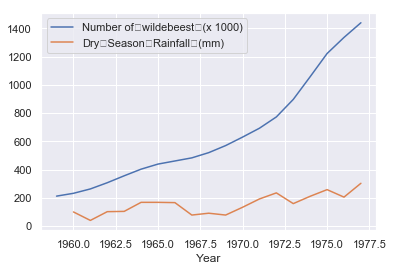

In [396]:
pd[:19].plot('Year')

### Here we plot and analyze the correlation between rainfall and number of wildebeest


Slope 0.15372154227719872
Intercept 51.86570025914486
r_value 0.8157960446802051
p_value 3.6727582242098064e-05
std_err 0.027244331433538285
[-9.73415390e-06  1.69655792e-01  4.68425921e+01]


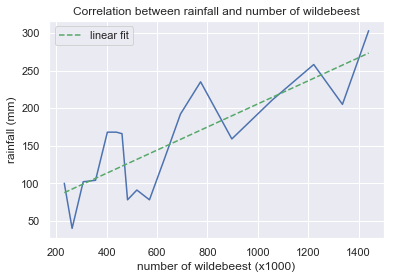

In [397]:
x = np.array([232,263,307,356,403,439,461,483,520,570,630,693,773,897,1058,1222,1336,1440])
y = np.array([100,40,102,104,168,168,166,78,91,78,133,192,235,159,211,258,205,303])

plt.title('Correlation between rainfall and number of wildebeest')
plt.plot(x,y)
plt.plot(x, line_fit, 'g--', label='linear fit'.format(sympy.latex(P)))
plt.legend()
plt.xlabel('number of wildebeest (x1000)')
plt.ylabel('rainfall (mm)')

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line_fit = slope*x+intercept
print('Slope', slope)
print('Intercept', intercept)
print('r_value', r_value)
print('p_value', p_value)
print('std_err', std_err)
print(z)

From the graph, we can conclude that there is a positive correlation between rain fall and number of wildebeest. As mentioned in the case study, more rainfall leads to an increase in biomass of grass (food for wildebeest) therefore more wildbeest will be produced. The sudden drops can be described as probably predation or other factors which is discussed later. With more prey (wildbeest), predators are more likely to hunt them down, decreasing in the amount of wildebeest and increase in the amount of predator. With less prey to prey on, predators will experience their decrease in population for lack of food. In turn, prey will be allowed to bounce back. 

# Section 2 (Differential Equations - Population model)

### In this section, we will use the Lotka-Volterra equations in order to analyze a competition model (predator-prey) by adding a predator (lion) to the wildebeest.
#### The set of equations used will come from the research paper (https://www.jstor.org/stable/pdf/2096748.pdf?casa_token=funM4jY30WgAAAAA:DnXaoXMcRitfuCOd38_n5NZyuvR68rOpYd7zyoitte7AR6ABm0k0a1pi3x7O-S9u2I7hBPFClqMazL_QN_zmoklNK2HBdMi5MLLZGSS9UKLnmLFOSQ), specifically under the competition model section of the research paper

#### In order to focus on the main part of the information we want from the research paper, we will use the following code to extract information

* Just like tabula, where it allowed us to read table data from a specific page of a .pdf file, we will implement PyPDF2 package to extract TEXT from a .pdf file
* This package will also have to be installed through a separate terminal (Jupyter contains a terminal that can be used for these purposes) in order for it to be imported as a package on a notebook.
* install using the command: pip install PyPDF2

In [398]:
text_pdf_file = open('2096748.pdf', 'rb')
pdf_file_reader = PyPDF2.PdfFileReader(text_pdf_file)
print(pdf_file_reader.numPages)

31


In [399]:
focus_page =  pdf_file_reader.getPage(15)
print(focus_page.extractText())

This content downloaded from 130.182.24.47 on Thu, 09 May 2019 18:01:01 UTCAll use subject to https://about.jstor.org/terms


* Unfortunately, this pdf contains some user restrictions. To check full, complete paper for yourself, click on link provided at section header.

    * I will provide a screenshot of the portion I will focus in the next cell.

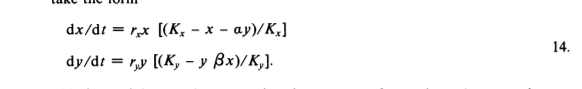

The above equations represent the interaction between two species (wildebeest and lions). This is known as the competition model. There are many models that exist, each has either more terms or less depending on how realistic the model is, consequently, it becomes either more or less complicated. In this case, the equations shown are a reasonable representation and can be coded fairly simply thanks to some packages.


Parameters:
    
    x = prey (wildebeest population thousands)
    r_x = growth rate of widebeest
    K_x = environment carrying capacity 
    alpha & beta = interaction parameters between the two species
    y = predator (lion population)
    r_y = growth rate of lions
    K_Y = environment carrying capacity
    
The parameters from the equation will be denoted differently in the code below:

    x = P_1
    y = P_2 
    K_x = K_1
    K_y = K_2
    r_x = r_1
    r_y = r_2

the purpose for this is for simplicity reasons that will be mentioned later. 

### Using sympy, we set the variables that will be used

In [400]:
r_1, P_1, K_1, alpha = sympy.symbols('r_1, P_1, K_1, alpha')
r_2, P_2, K_2, beta = sympy.symbols('r_2, P_2, K_2, beta')

###  Now we can code the Lotka-Volterra equations

In [401]:
dP_1dt = r_1*P_1*((K_1 - P_1 - alpha*P_2)/K_1)   ### Prey equation
dP_2dt = r_2*P_2*((K_2 - P_2 - beta*P_1)/K_2)    ### Predator equation
 
sympy.init_printing(use_unicode=True)        ### Sympy has a neat option of printing the code in Latex format
print('This is what we get in Latex, thank you sympy!:')
dP_1dt, dP_2dt

This is what we get in Latex, thank you sympy!:


### Population dynamics is considered a dynamical system and in system theory we require  a steady state. 

if the variables (called state variables) which define the behavior of the system or the process are unchanging in time, it is called a steady state. In other words, the derivative with respect to time is zero.


### Here we set the steady states for the equations

In [402]:
steadystate_P_1 = sympy.Eq(dP_1dt, 0)   ### sympy.Eq allows us to set equations in an easy manner that can be solved later
steadystate_P_2 = sympy.Eq(dP_2dt, 0)
steadystate_P_1, steadystate_P_2

### We can now solve for the steady states

In [403]:
sol1 = sympy.solve(steadystate_P_1, P_1) ### sympy.solve allows us to solve the equations
sol2 = sympy.solve(steadystate_P_2, P_2)
sol1, sol2

 The previous output suggests that there are two types of solutions: a solution where both P_1 and P_2 are zero and a solution where both wildebeest and lions mantain 𝐾1−𝑃2𝛼 , 𝐾2−𝑃1𝛽 respectively (nonzero populations).



### We can solve for the exact solution now

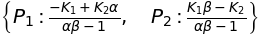

In [404]:
steadystate_dict = sympy.solve((sympy.Eq(P_1, sol1[1]), sympy.Eq(P_2,sol2[1])), ### we use sympy.solve again to solve
                               (P_1, P_2))                                      ### exact solutions at the same time
steadystate_dict

### Here we create a function for the right hand side of the lotka-volterra equations

* For more information on lambdify and unpacking, check: 
    * https://docs.sympy.org/latest/modules/utilities/lambdify.html
    * https://www.geeksforgeeks.org/packing-and-unpacking-arguments-in-python/

In [405]:
### we can utilize a function within sympy called 'lambdify' to take in a symbolic expression and return a function that 
### can be evaluated using other values
### this prevents us from writing it over and over again

dP_1dt_num = sympy.utilities.lambdify([P_1,P_2,r_1,K_1,alpha],dP_1dt)
dP_2dt_num = sympy.utilities.lambdify([P_2,P_1,r_2,K_2,beta],dP_2dt)

def competition_model(p1_p2, t, *p): ### create a function for the right hand side of competition model equations
    
    p1, p2 = p1_p2                   ### unpack variables
    r_1, k_1, a, r_2, k_2, b = p     ### unpack parameters   ### for tuples, the syntax for unpacking is *
                                                             ### for dictionaries, syntax for unpacking is **
    p1_derivative = dP_1dt_num(p1,p2,r_1,k_1, a)
    p2_derivative = dP_2dt_num(p2,p1,r_2,k_2, b)     ### we set the derivatives for the lambdified functions
    
    return np.array([p1_derivative, p2_derivative])
    


### Set the paramaters for wildbeest using the values from case study of wildbeest provided at beginning of notebook
### The paramaters for lions do not come from a particular source but were set using reasonable values

* For more information on args, check here:
    http://book.pythontips.com/en/latest/args_and_kwargs.html

In [406]:
r_1, r_2 = [0.8, 0.6]
k_1, k_2 = [1000, 500]
a, b= [1, 0.3]
p1_p2_initial = [212, 100]
t = np.linspace(0,100,100)

p1_p2 = odeint(competition_model, p1_p2_initial, t, args=args) ## including args here fixes the code
                                                               ## not including args would give error message

### Plot the solution and check if they do indeed converge to the steady states 

Text(0, 0.5, 'Population size')

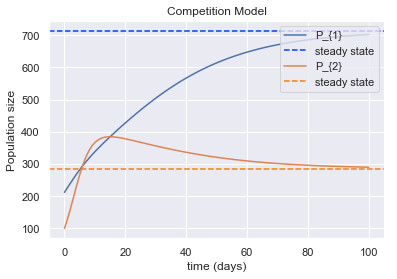

In [407]:
for i, P in enumerate([P_1,P_2]):
    plt.plot(t,p1_p2[:, i], label=format(sympy.latex(P)))   
    plt.axhline(y=steadystate_dict[P].subs({K_1:k_1, K_2:k_2, alpha:a, beta:b}),  ### axhline allows for a horizontal line
               linestyle='--', color=sb.color_palette('bright')[i],
               label='steady state'.format(sympy.latex(P)))

### seaborn makes plots nicer, so why not
    
sb.set() 
plt.title('Competition Model')
plt.legend(loc='upper right')
plt.xlabel('time (days)')
plt.ylabel('Population size')

## References

The references that helped me create this notebook are the links provided throughout the notebook.
Most of them are links to python's documentation for each package

